In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import json
from sklearn.datasets import make_classification
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [19]:
# Load user input data
with open('user.json', 'r') as f:
    user_data = json.load(f)

# Create label encoders
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()


In [20]:

data = user_data["data"]
result = user_data["result"]
dataframe = pd.DataFrame(data, columns=["Name","Type 1", "Type 2", "Generation","legendary", "color","first_letter"])
resultframe = pd.DataFrame(result, columns=["favorite"])

print(resultframe)

# Generate numerical labels
dataframe["Name"] = le1.fit_transform(dataframe["Name"])
dataframe["Type 1"] = le2.fit_transform(dataframe["Type 1"])
dataframe["Type 2"] = le3.fit_transform(dataframe["Type 2"])
dataframe["Generation"] = le4.fit_transform(dataframe["Generation"])
dataframe["legendary"] = le5.fit_transform(dataframe["legendary"])
dataframe["color"] = le6.fit_transform(dataframe["color"])
dataframe["first_letter"] = le7.fit_transform(dataframe["first_letter"])
resultframe["favorite"] = le8.fit_transform(resultframe["favorite"])

print(resultframe)

# Split data into training and testing sets
train_data = dataframe.sample(frac=0.8, random_state=0)
test_data = dataframe.drop(train_data.index)

# Split labels into training and testing sets
train_labels = resultframe.sample(frac=0.8, random_state=0)
test_labels = resultframe.drop(train_labels.index)

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=0) # n_estimators is the number of trees in the forest

# Train the model
model.fit(train_data, train_labels)



        favorite
0    notfavorite
1    notfavorite
2       favorite
3    notfavorite
4    notfavorite
..           ...
581  notfavorite
582  notfavorite
583  notfavorite
584     favorite
585  notfavorite

[586 rows x 1 columns]
     favorite
0           1
1           1
2           0
3           1
4           1
..        ...
581         1
582         1
583         1
584         0
585         1

[586 rows x 1 columns]


C:\Users\Tototime\AppData\Local\Temp\ipykernel_103936\144521416.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_data, train_labels)


RandomForestClassifier(random_state=0)

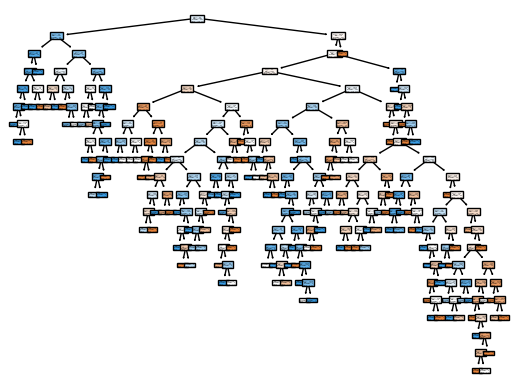

In [23]:
plot_tree(model.estimators_[0], filled=True)

In [ ]:
# Test du modèle

data={"Name":"Pikachu","Type 1":"Electric","Type 2":"None","Generation":1,"legendary":False,"color":"Yellow (RYB)","first_letter":"P"}

data2={"Name":"Bulbasaur","Type 1":"Grass","Type 2":"Poison","Generation":1,"legendary":False,"color":"Green","first_letter":"B"}

#pokemon legendaire
data3={"Name":"Mewtwo","Type 1":"Psychic","Type 2":"None","Generation":1,"legendary":True,"color":"Purple","first_letter":"M"}

# Créer un dataframe pour le nouveau Pokémon
pokemon = pd.DataFrame([data], columns=["Name","Type 1", "Type 2", "Generation","legendary", "color","first_letter"])
pokemon2 = pd.DataFrame([data2], columns=["Name","Type 1", "Type 2", "Generation","legendary", "color","first_letter"])
pokemon3 = pd.DataFrame([data3], columns=["Name","Type 1", "Type 2", "Generation","legendary", "color","first_letter"])

# Encoder les données
pokemon["Name"] = le1.fit_transform(pokemon["Name"])
pokemon["Type 1"] = le2.fit_transform(pokemon["Type 1"])
pokemon["Type 2"] = le3.fit_transform(pokemon["Type 2"])
pokemon["Generation"] = le4.fit_transform(pokemon["Generation"])
pokemon["legendary"] = le5.fit_transform(pokemon["legendary"])
pokemon["color"] = le6.fit_transform(pokemon["color"])
pokemon["first_letter"] = le7.fit_transform(pokemon["first_letter"])

pokemon2["Name"] = le1.fit_transform(pokemon2["Name"])
pokemon2["Type 1"] = le2.fit_transform(pokemon2["Type 1"])
pokemon2["Type 2"] = le3.fit_transform(pokemon2["Type 2"])
pokemon2["Generation"] = le4.fit_transform(pokemon2["Generation"])
pokemon2["legendary"] = le5.fit_transform(pokemon2["legendary"])
pokemon2["color"] = le6.fit_transform(pokemon2["color"])
pokemon2["first_letter"] = le7.fit_transform(pokemon2["first_letter"])

pokemon3["Name"] = le1.fit_transform(pokemon3["Name"])
pokemon3["Type 1"] = le2.fit_transform(pokemon3["Type 1"])
pokemon3["Type 2"] = le3.fit_transform(pokemon3["Type 2"])
pokemon3["Generation"] = le4.fit_transform(pokemon3["Generation"])
pokemon3["legendary"] = le5.fit_transform(pokemon3["legendary"])
pokemon3["color"] = le6.fit_transform(pokemon3["color"])
pokemon3["first_letter"] = le7.fit_transform(pokemon3["first_letter"])


# Prédire si le Pokémon est un favori
prediction = model.predict(pokemon)
prediction2 = model.predict(pokemon2)
prediction3 = model.predict(pokemon3)

# Afficher la prédiction
print("Prediction pour Pikachu: ", prediction)
print("Prediction pour Bulbasaur: ", prediction2)
print("Prediction pour Mewtwo: ", prediction3)